In [ ]:
! pip install pandas_ta

# some how panada_ta was not installing in the jupyter notebook so I had to use this command

In [ ]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta as ta
import warnings
warnings.filterwarnings("ignore")


In [ ]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
end_date = dt.datetime.now()
start_date = pd.to_datetime(end_date)-pd.DateOffset(365*8)


In [15]:
df = yf.download(tickers=symbols_list, start=start_date, end=end_date)
df = df.stack()
df.index.names = ['Date', 'Ticker']
df.columns = df.columns.str.lower()


[*********************100%%**********************]  503 of 503 completed


Calculate features and technical indicators of each stock
Garman-Klass Volatility
RSI
Boilinger Bands
ATR
MACD
Dollar Volume


<Axes: xlabel='Date'>

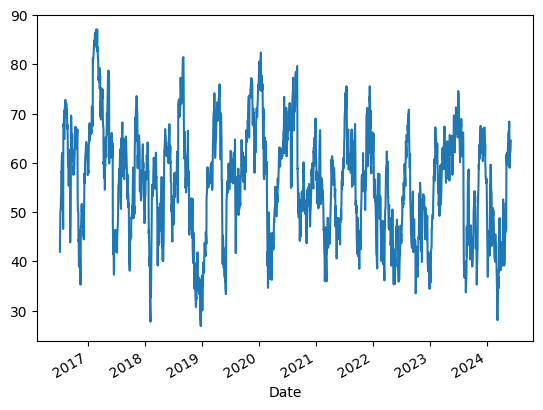

In [25]:
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: ta.rsi(x, length=20))
df.xs('AAPL',level=1)['rsi'].plot()

In [26]:
df

Price               adj close       close        high         low        open  \
Date       Ticker                                                               
2016-06-06 A        43.034206   45.860001   46.009998   45.720001   45.720001   
           AAL      30.041590   31.260000   31.299999   30.379999   30.770000   
           AAPL     22.647585   24.657499   25.472500   24.387501   24.497499   
           ABBV     44.519554   62.820000   62.990002   61.869999   62.130001   
           ABT      33.807789   39.169998   39.380001   39.049999   39.250000   
...                       ...         ...         ...         ...         ...   
2024-05-31 XYL     141.020004  141.020004  141.389999  138.130005  139.710007   
           YUM     137.429993  137.429993  137.570007  134.800003  135.160004   
           ZBH     115.150002  115.150002  115.190002  113.750000  114.370003   
           ZBRA    312.339996  312.339996  318.769989  308.160004  316.609985   
           ZTS     169.559998  169.559998  172.149994  167.960007  170.000000   

Price                  volume  garman_klass_volatility  garman_klass_vol  \
Date       Ticker                                                          
2016-06-06 A        2359000.0                -5.392877         -0.001396   
           AAL      8335400.0                -4.105375          0.000223   
           AAPL    93170000.0                -3.484626         -0.001434   
           ABBV    16403400.0                -6.479384         -0.042752   
           ABT      9157100.0                -4.887514         -0.008571   
...                       ...                      ...               ...   
2024-05-31 XYL      3015200.0                -9.667827          0.000238   
           YUM      2282900.0                -9.561630          0.000100   
           ZBH      3003100.0                -8.832119          0.000061   
           ZBRA      507200.0               -13.537834          0.000502   
           ZTS      4088400.0               -10.552103          0.000301   

Price                    rsi  
Date       Ticker             
2016-06-06 A             NaN  
           AAL           NaN  
           AAPL          NaN  
           ABBV          NaN  
           ABT           NaN  
...                      ...  
2024-05-31 XYL     58.242533  
           YUM     50.742953  
           ZBH     36.951438  
           ZBRA    52.600453  
           ZTS     52.271016  

[992106 rows x 9 columns]